<a href="https://colab.research.google.com/github/sanskratis17/laptop-price-pridiction/blob/main/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **CENSUS INCOME**



<a name = Section0></a>
<h1 style = "color : #79cc79"> Table of Content</h1>

-  [**Introduction**](#Section1)<br>
-  [**Problem Statement**](#Section2)<br>
-  [**Installing and Importing Libraries**](#Section3)<br>
-  [**Data Defination and Aquisition**](#Section4)<br>
-  [**Data Pre-Profiling**](#Section5)<br>
-  [**Data Pre Processing**](#Section6)<br>
-  [**Data Post-Profiliing**](#Section7)<br>
-  [**Exploratory Data Analysis**](#Section8)<br>
-  [**x,y split**](#Section9)<br>
-  [**Train Test Split**](#Section1)<br>
-  [**Categorical and Continues Split**](#Section2)<br>
-  [**Scaling**](#Section3)<br>
-  [**Encoding**](#Section4)<br>
-  [**EDA 2**](#Section5)<br>
-  [**Modeling**](#Section6)<br>
-  [**Model Evaluation**](#Section7)<br>
-  [**Conclusion**](#Section9)<br>


##INTRODUCTION
Census income data is a collection of information about an individual's income and other characteristics, such as age, work class, and education level. This data can be used to model and predict whether an individual's income is above or below a certain threshold, such as $50,000.

##Problem Statement

Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

##IMPORTING LIBRARIES

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<a name = Section4></a>
<h1 style = "color : #79cc79"> Data Defination and Aquisition</h1>

 | Records | Features | Dataset Size |
          | :--: | :--: | :--: |
          | 32562  | 15 | 3.7+mb  |


| ID | Feature                  | Description                       |
| :--| :------------------------| :---------------------------------|
| 1  | **age:**                 |Age of individual||||
| 2  | **work class:**                | Sector of their job |  
| 3  | **final weight:**              | number of people the entry represents|  
| 4  | **education:**                 | level of education |
| 5  | **education-num:**               |number of education level |
| 6  | **marital status:**            |shows the marital status               |  
| 7  | **occupation:**        |occupation of individual.|  
| 8 | **Relationship:**           | Any relationship present              |
| 9 | **Race:**             | race of individual  
| 10 | **sex:**             |  sex/gender of individual
| 11  | **Capital-gain:**                 |total gain amount|
| 12  | **Capital-loss:**                | total loss amount |  
| 13  | **hours-per-week:**              | number of working hours|  
| 14  | **Native country:**                 | native country of individual |
| 15  | **income:**                 | shows weather income is greater 50k or not |

In [135]:
income_df=pd.read_csv('/content/income_cencex.csv')

In [136]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


##DATA PRE-PROFILING

In [137]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [138]:
income_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [139]:
income_df[income_df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25.0,Private,308144.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,Mexico,<=50K
5104,90.0,Private,52386.0,Some-college,10.0,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K
9171,21.0,Private,250051.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,10.0,United-States,<=50K
11631,20.0,Private,107658.0,Some-college,10.0,Never-married,Tech-support,Not-in-family,White,Female,0.0,0.0,10.0,United-States,<=50K
13084,25.0,Private,195994.0,1st-4th,2.0,Never-married,Priv-house-serv,Not-in-family,White,Female,0.0,0.0,40.0,Guatemala,<=50K
15059,21.0,Private,243368.0,Preschool,1.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,50.0,Mexico,<=50K
17040,46.0,Private,173243.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
18555,30.0,Private,144593.0,HS-grad,9.0,Never-married,Other-service,Not-in-family,Black,Male,0.0,0.0,40.0,?,<=50K
18698,19.0,Private,97261.0,HS-grad,9.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
21318,19.0,Private,138153.0,Some-college,10.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,10.0,United-States,<=50K


<Axes: >

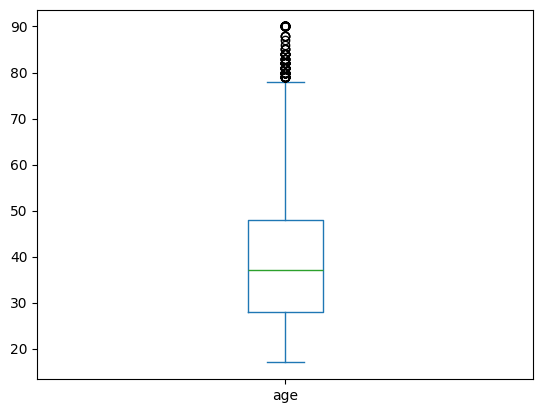

In [140]:
income_df['age'].plot.box()

<Axes: >

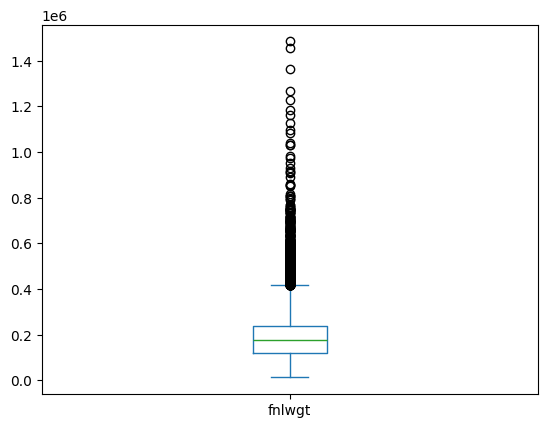

In [141]:
income_df['fnlwgt'].plot.box()

<Axes: >

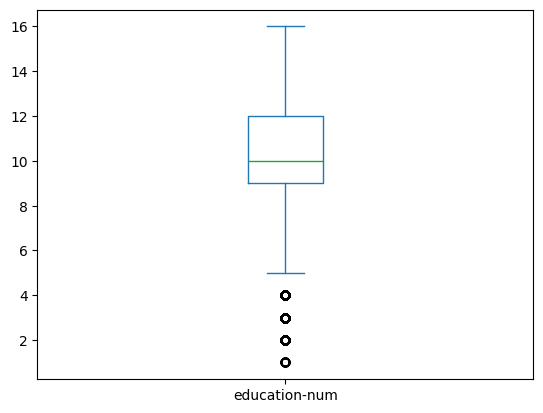

In [142]:
income_df['education-num'].plot.box()

<Axes: >

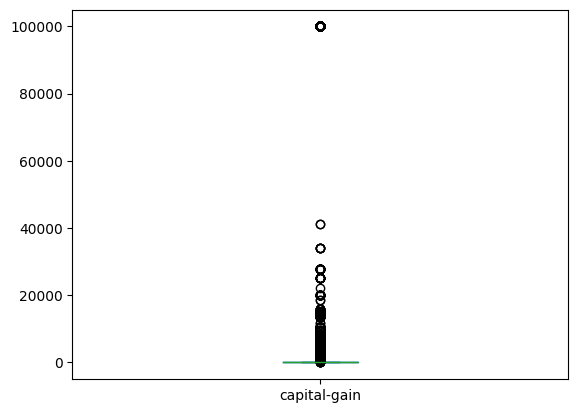

In [143]:
income_df['capital-gain'].plot.box()

<Axes: >

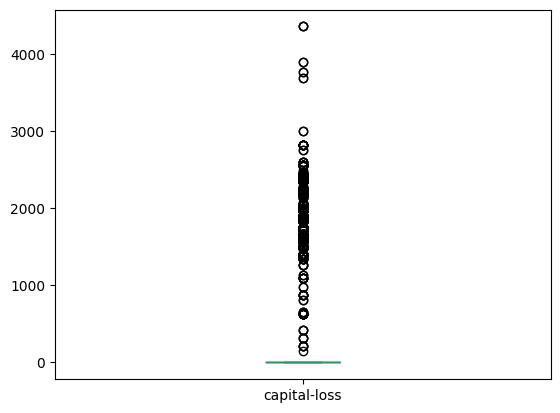

In [144]:
income_df['capital-loss'].plot.box()

<Axes: >

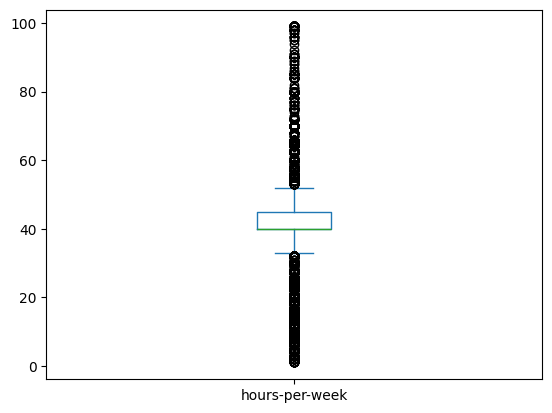

In [145]:
income_df['hours-per-week'].plot.box()

##DATA PRE-PROSSESING

In [146]:
income_df.drop_duplicates(inplace=True)

In [147]:
income_df[income_df['capital-loss']!=0].describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [148]:
income_df[income_df['capital-loss']==0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [149]:
income_df['income'].value_counts()

,count
income,
<=50K,24698
>50K,7839


In [150]:
oh=pd.get_dummies(income_df['income'])

In [151]:
inc_df = pd.concat([income_df,oh], axis = 1)
inc_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,True,False
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,True,False
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,True,False
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,True,False
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,True,False


In [152]:
inc_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', ' <=50K', ' >50K'],
      dtype='object')

In [153]:
inc_df.drop(columns=['income'], inplace = True)

In [154]:
inc_df.drop(columns=[' <=50K'], inplace = True)

In [155]:
inc_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       ' >50K'],
      dtype='object')

In [156]:
inc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32538 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  float64
 3   education       32537 non-null  object 
 4   education-num   32537 non-null  float64
 5   marital-status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    32537 non-null  object 
 8   race            32537 non-null  object 
 9   sex             32537 non-null  object 
 10  capital-gain    32537 non-null  float64
 11  capital-loss    32537 non-null  float64
 12  hours-per-week  32537 non-null  float64
 13  native-country  32537 non-null  object 
 14   >50K           32538 non-null  bool   
dtypes: bool(1), float64(6), object(8)
memory usage: 3.8+ MB


##EDA

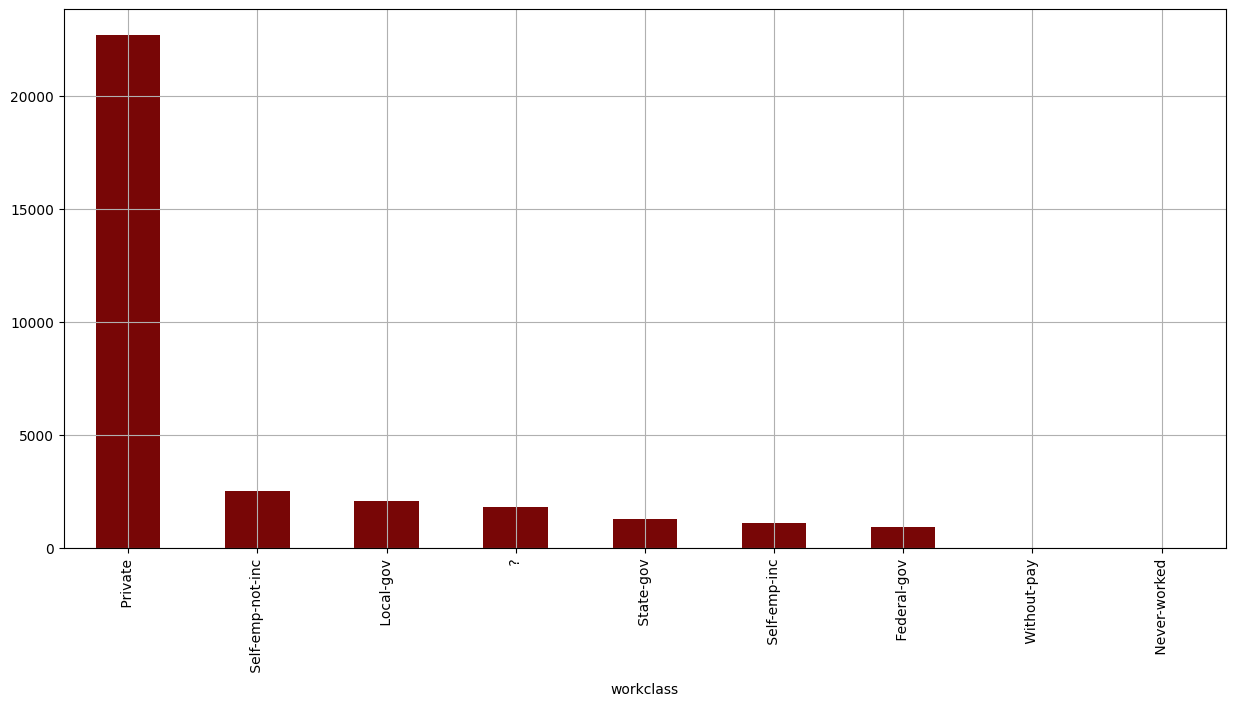

In [157]:
plt.figure(figsize = [15,7])
inc_df['workclass'].value_counts().plot.bar(color='#780606')
plt.grid()

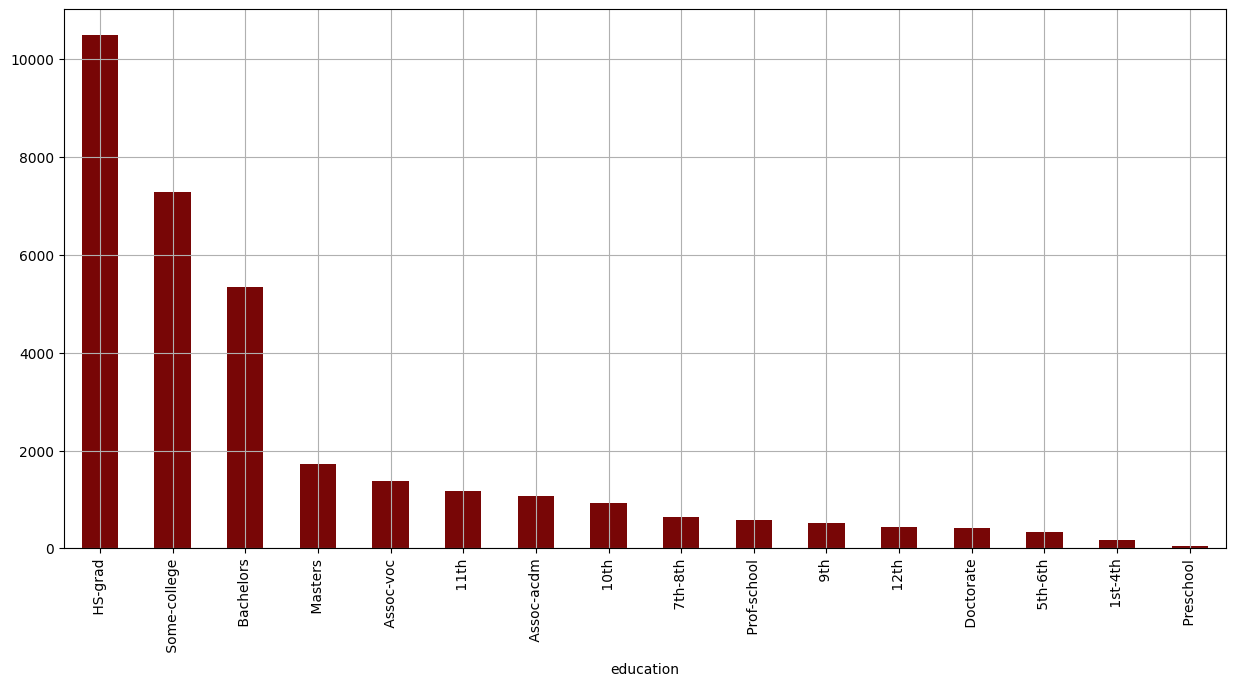

In [158]:
plt.figure(figsize = [15,7])
inc_df['education'].value_counts().plot.bar(color='#780606')
plt.grid()

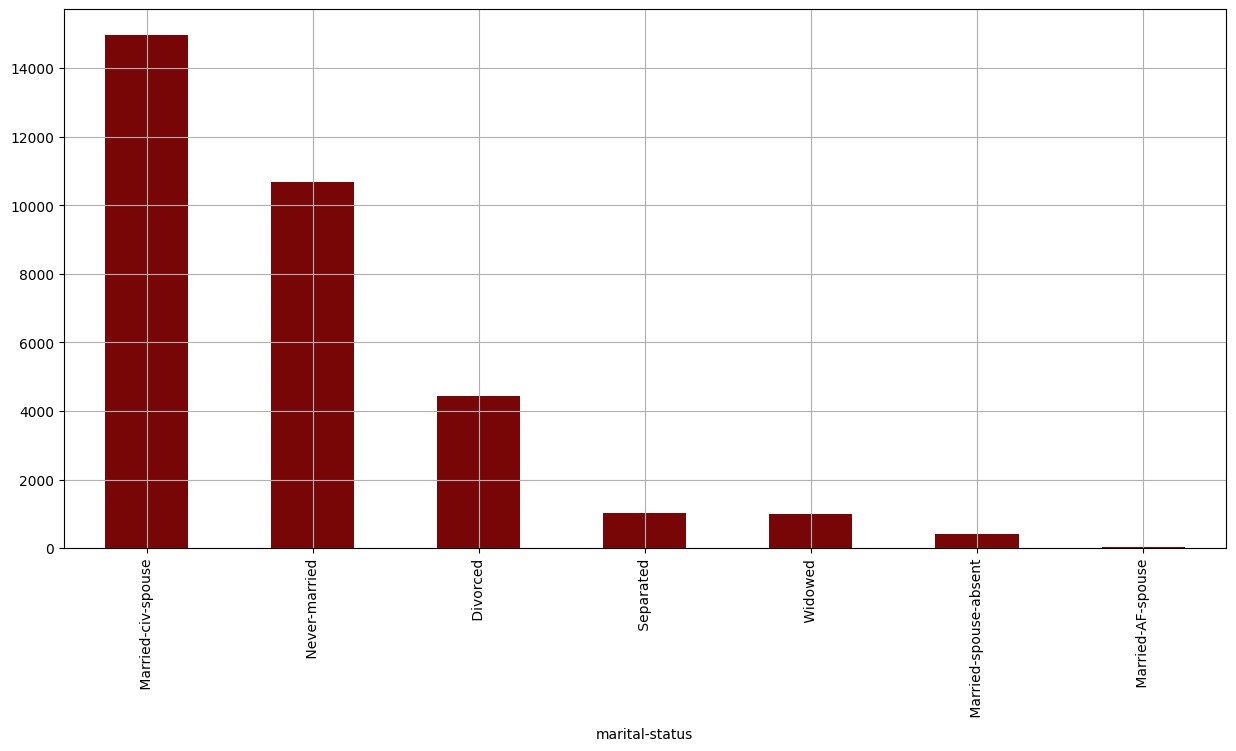

In [159]:
plt.figure(figsize = [15,7])
inc_df['marital-status'].value_counts().plot.bar(color='#780606')
plt.grid()

In [160]:
inc_df['occupation'].value_counts()

,count
occupation,
Prof-specialty,4136
Craft-repair,4094
Exec-managerial,4065
Adm-clerical,3768
Sales,3650
Other-service,3291
Machine-op-inspct,2000
?,1843
Transport-moving,1597


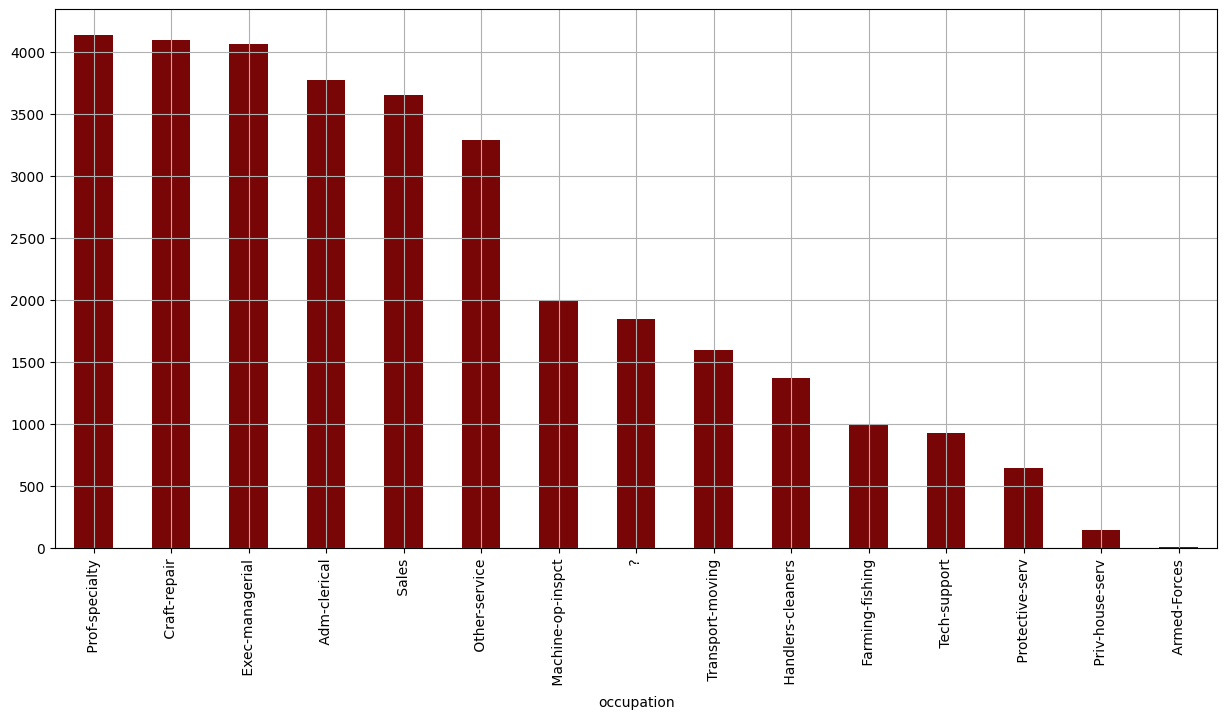

In [161]:
plt.figure(figsize = [15,7])
inc_df['occupation'].value_counts().plot.bar(color='#780606')
plt.grid()

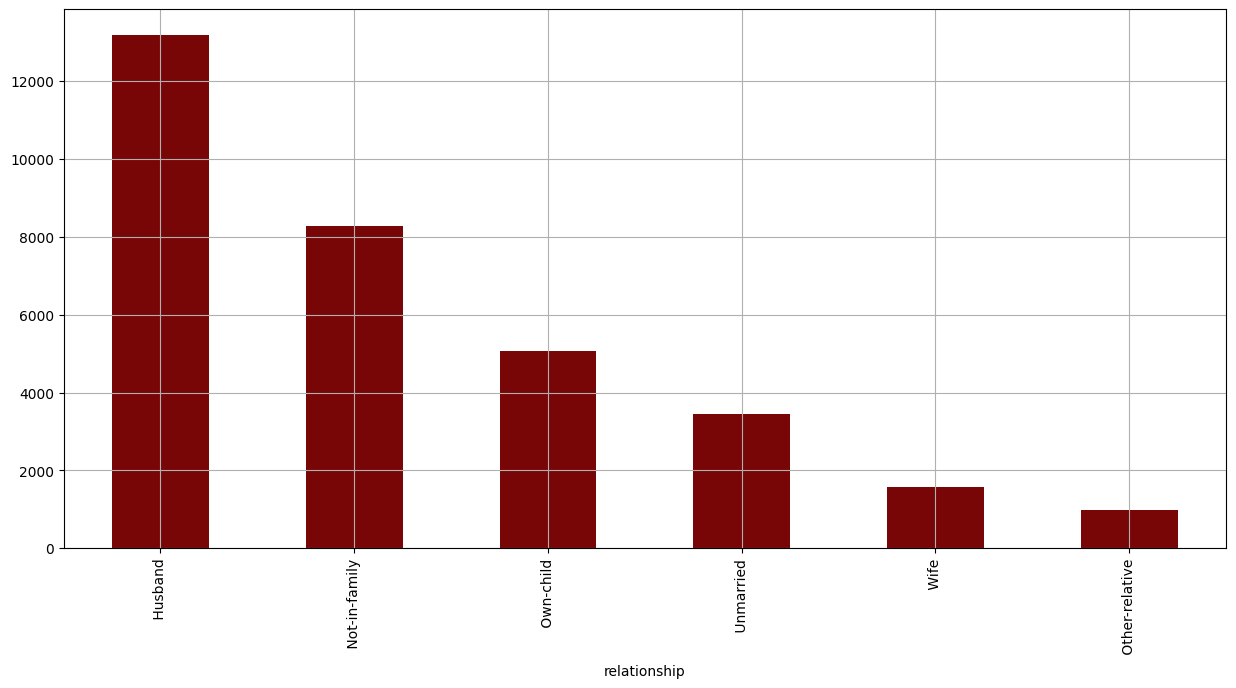

In [162]:
plt.figure(figsize = [15,7])
inc_df['relationship'].value_counts().plot.bar(color='#780606')
plt.grid()

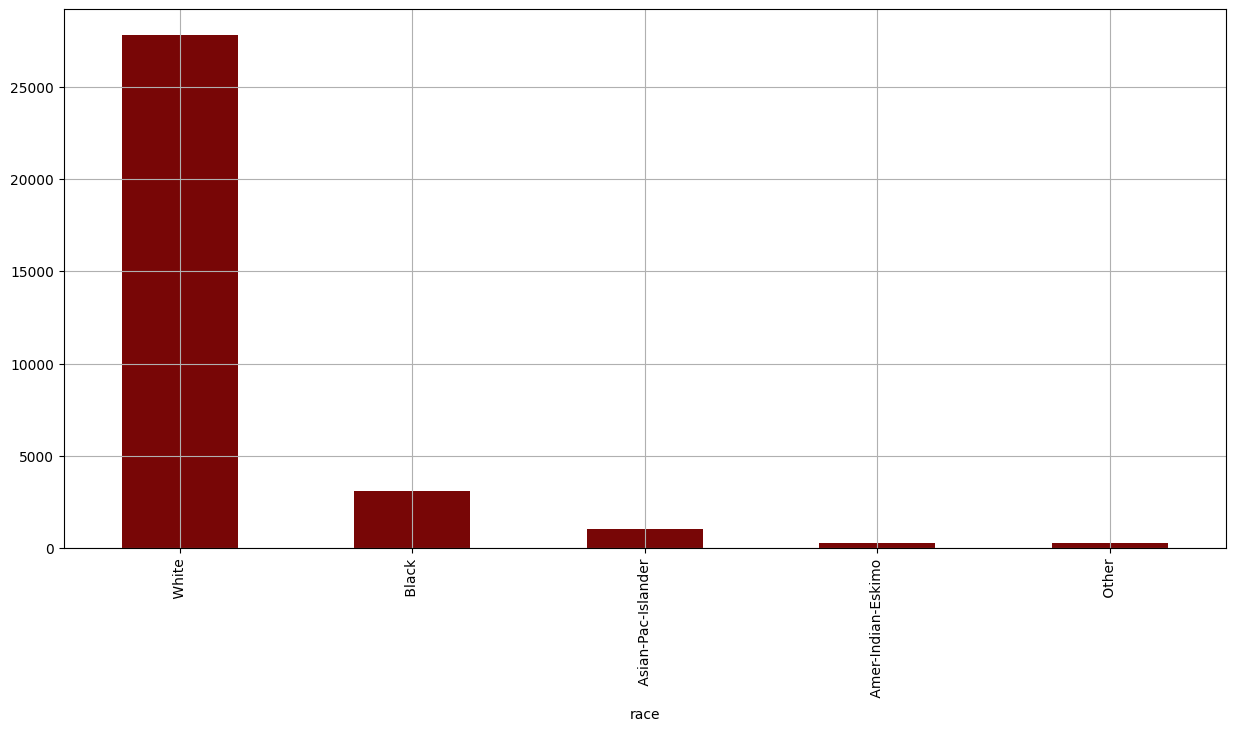

In [163]:
plt.figure(figsize = [15,7])
inc_df['race'].value_counts().plot.bar(color='#780606')
plt.grid()

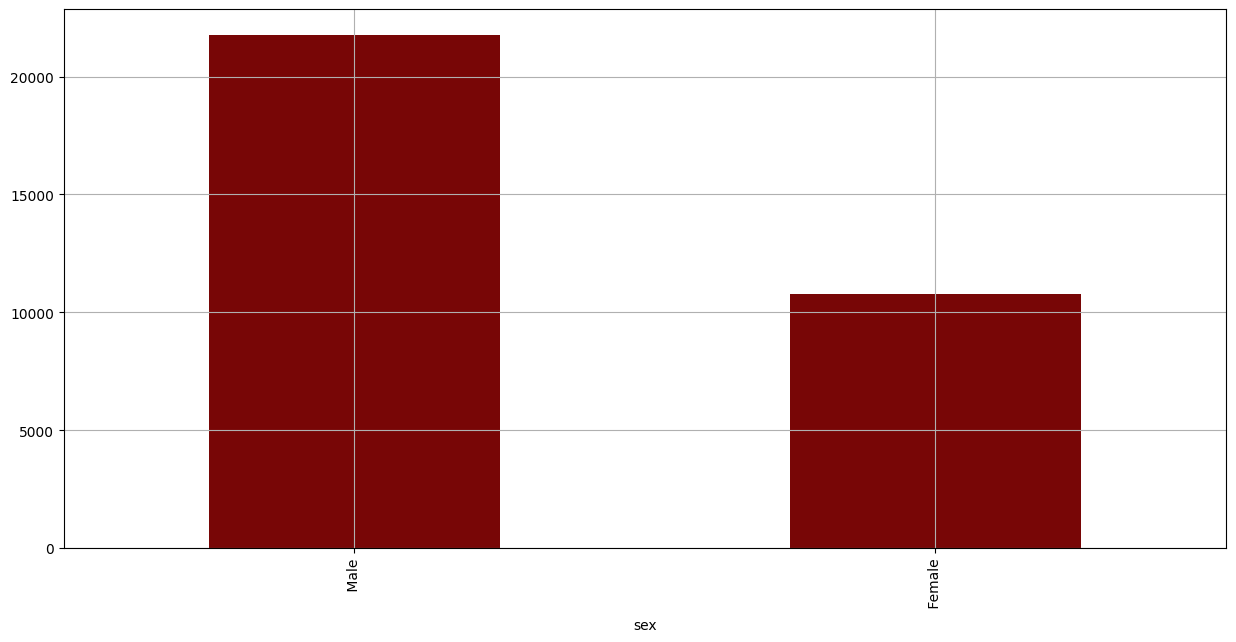

In [164]:
plt.figure(figsize = [15,7])
inc_df['sex'].value_counts().plot.bar(color='#780606')
plt.grid()

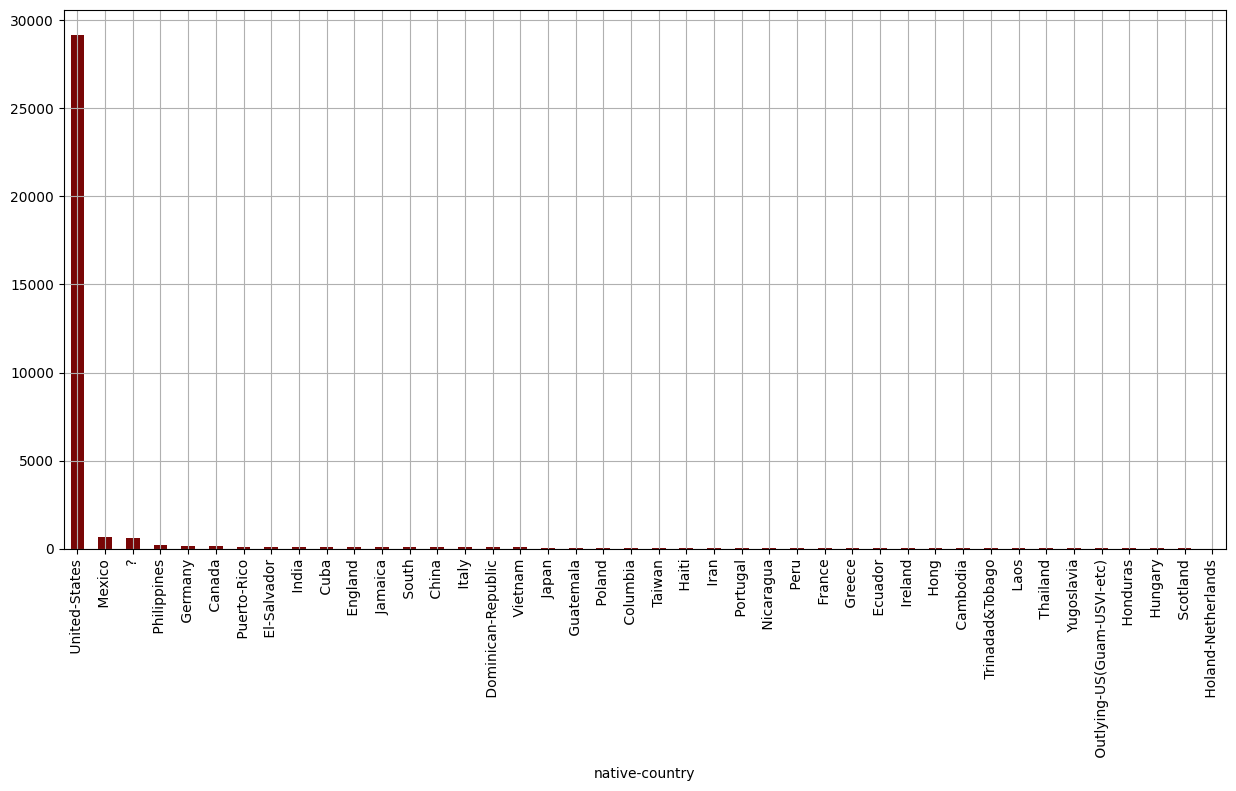

In [165]:
plt.figure(figsize = [15,7])
inc_df['native-country'].value_counts().plot.bar(color='#780606')
plt.grid()

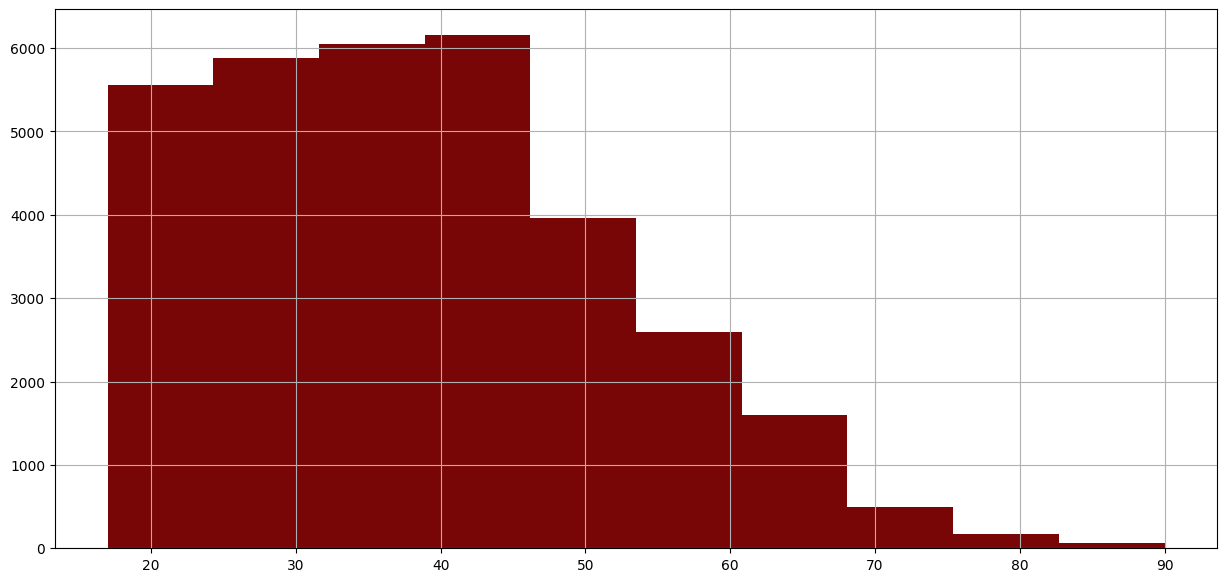

In [166]:
plt.figure(figsize  = (15,7))
plt.hist(inc_df['age'] ,color='#780606')
plt.grid()

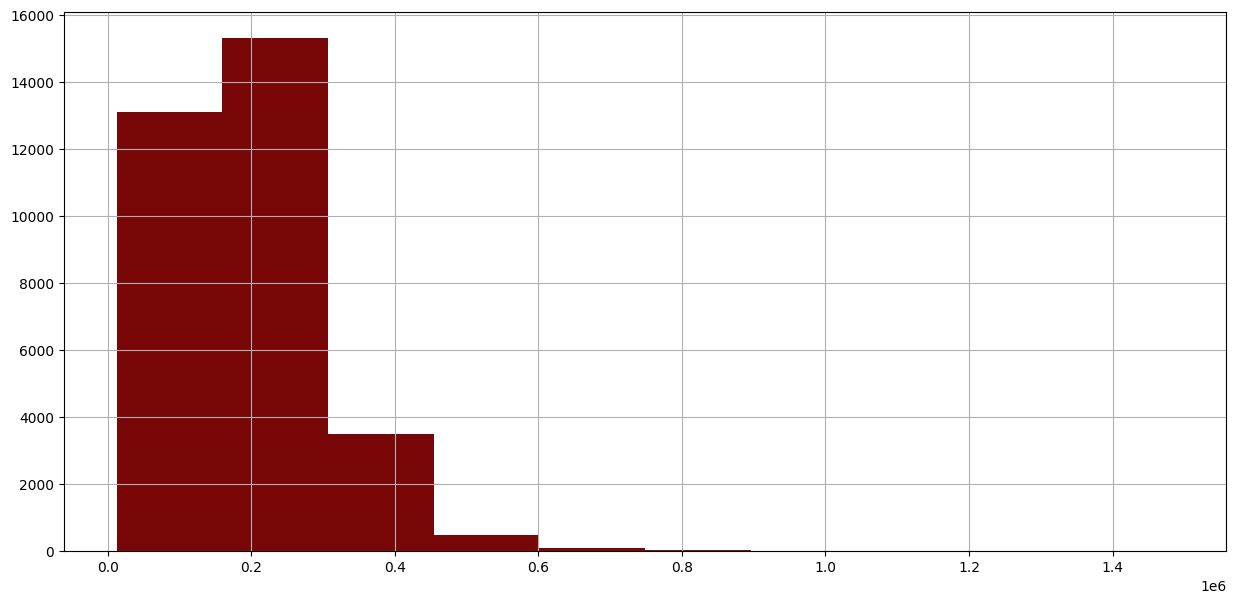

In [167]:
plt.figure(figsize  = (15,7))
plt.hist(inc_df['fnlwgt'] ,color='#780606')
plt.grid()

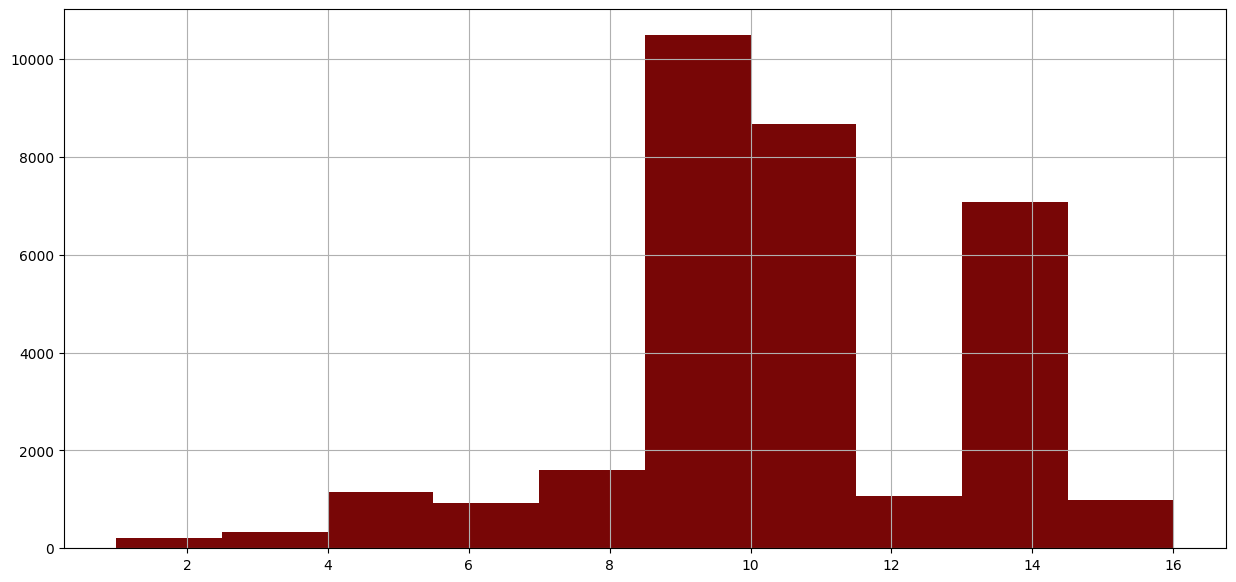

In [168]:
plt.figure(figsize  = (15,7))
plt.hist(inc_df['education-num'] ,color='#780606')
plt.grid()

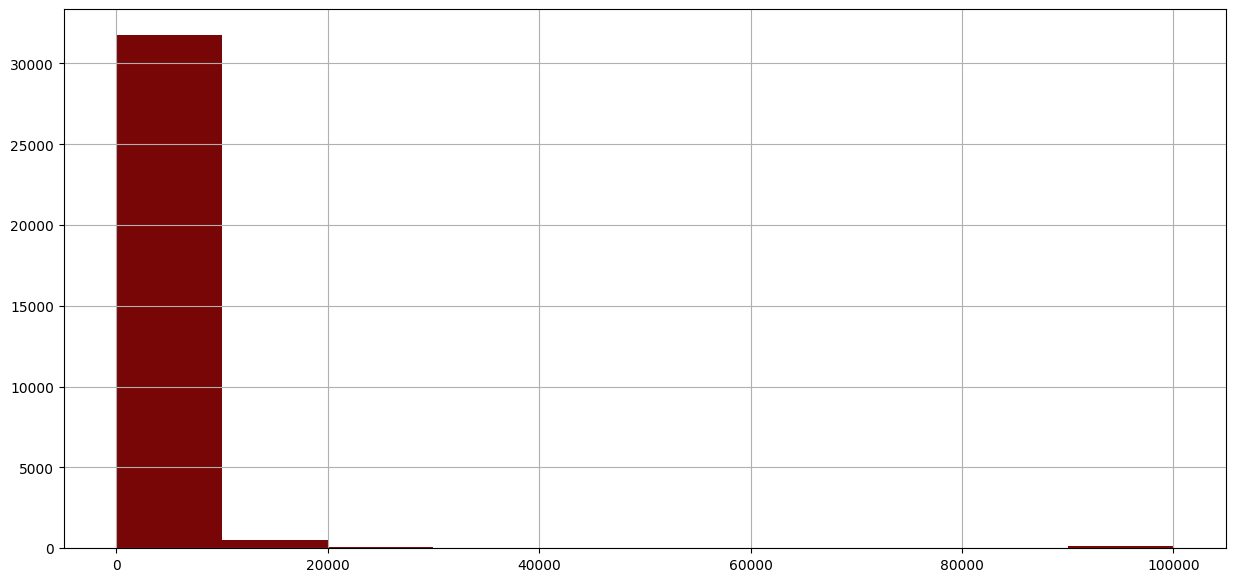

In [169]:
plt.figure(figsize  = (15,7))
plt.hist(inc_df['capital-gain'] ,color='#780606')
plt.grid()

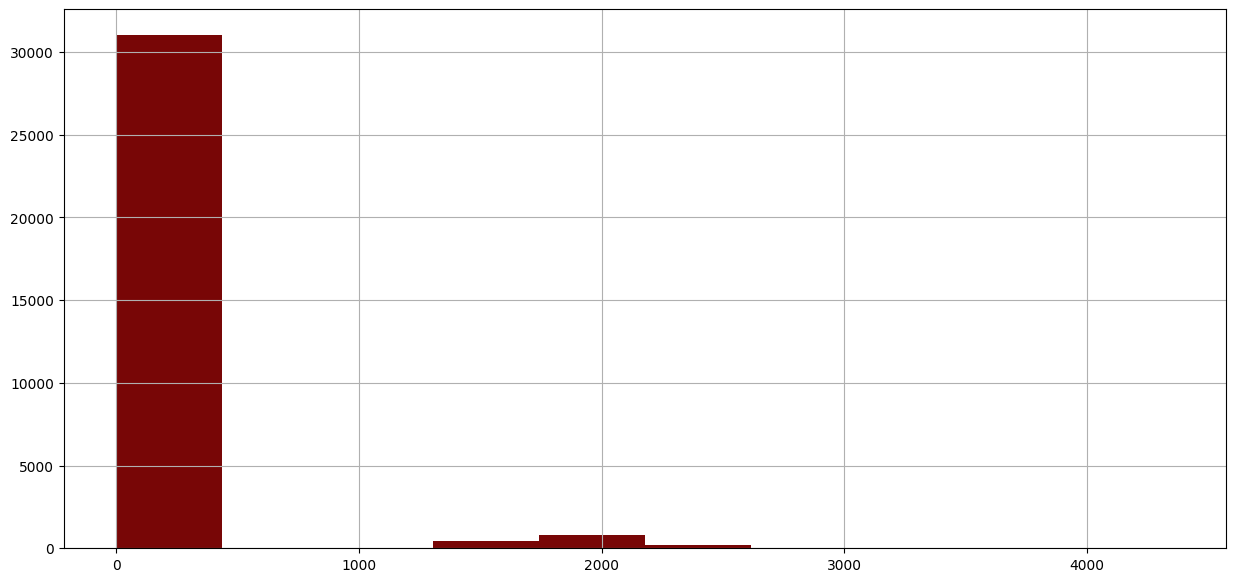

In [170]:
plt.figure(figsize  = (15,7))
plt.hist(inc_df['capital-loss'] ,color='#780606')
plt.grid()

<ipython-input-171-647a408099df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workclass',y='capital-gain',data=inc_df,palette='rainbow')


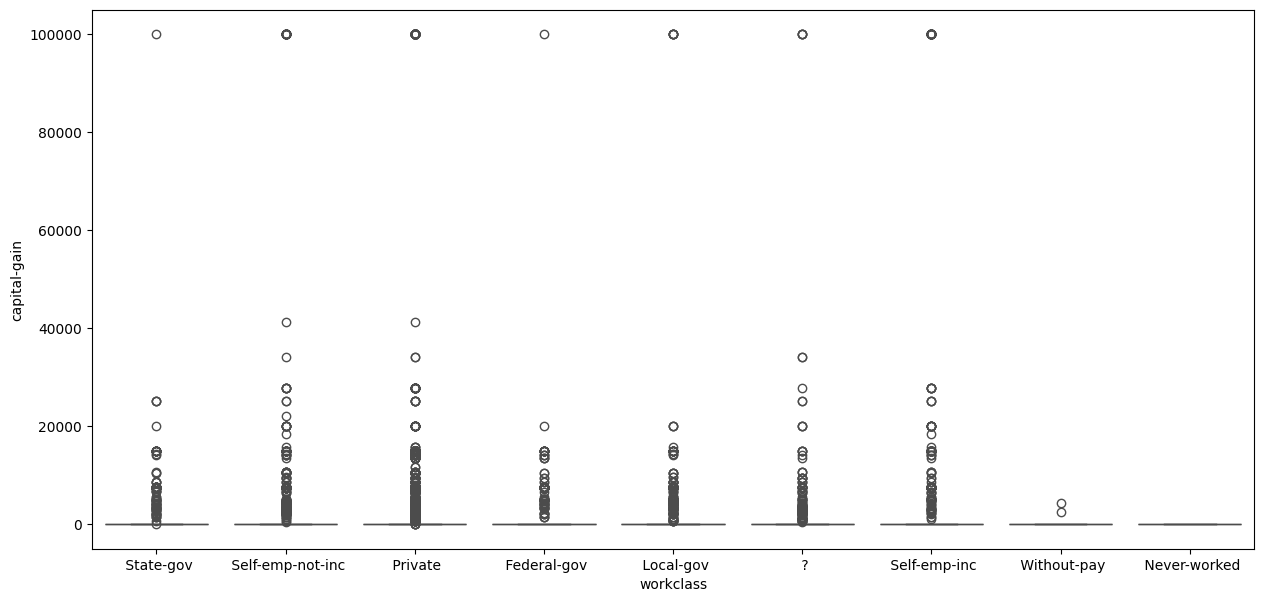

In [171]:
plt.figure(figsize  = (15,7))
sns.boxplot(x='workclass',y='capital-gain',data=inc_df,palette='rainbow')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

<ipython-input-172-23a6e1c44db0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workclass',y='capital-loss',data=inc_df,palette='rainbow')


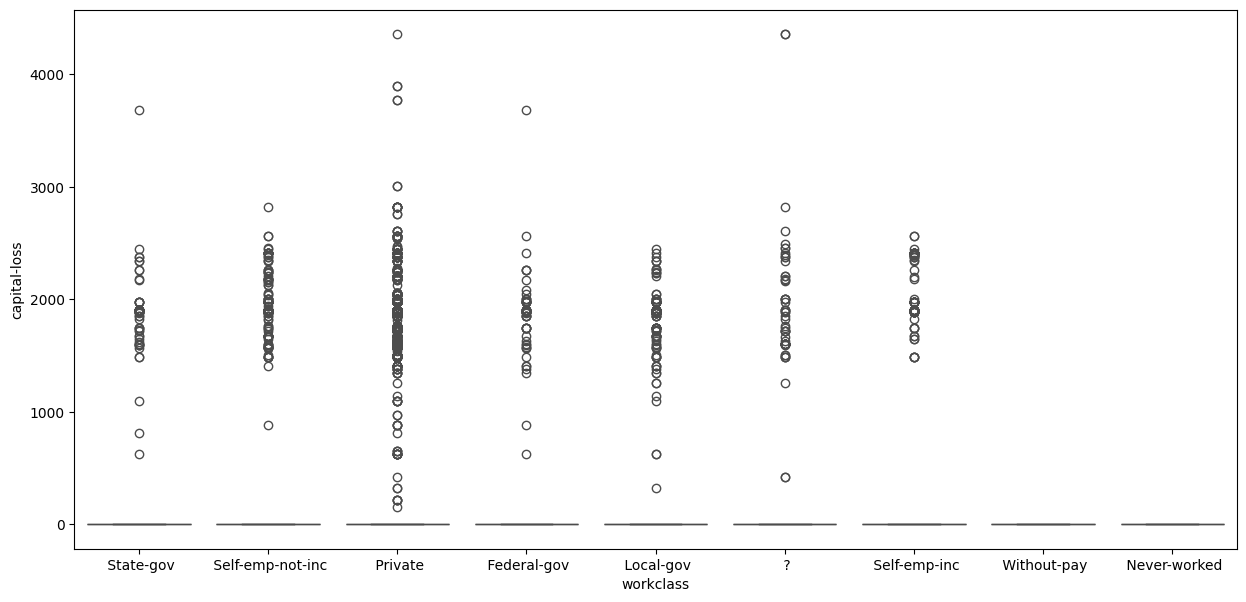

In [172]:
plt.figure(figsize  = (15,7))
sns.boxplot(x='workclass',y='capital-loss',data=inc_df,palette='rainbow')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [173]:
inc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32538 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  float64
 3   education       32537 non-null  object 
 4   education-num   32537 non-null  float64
 5   marital-status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    32537 non-null  object 
 8   race            32537 non-null  object 
 9   sex             32537 non-null  object 
 10  capital-gain    32537 non-null  float64
 11  capital-loss    32537 non-null  float64
 12  hours-per-week  32537 non-null  float64
 13  native-country  32537 non-null  object 
 14   >50K           32538 non-null  bool   
dtypes: bool(1), float64(6), object(8)
memory usage: 3.8+ MB


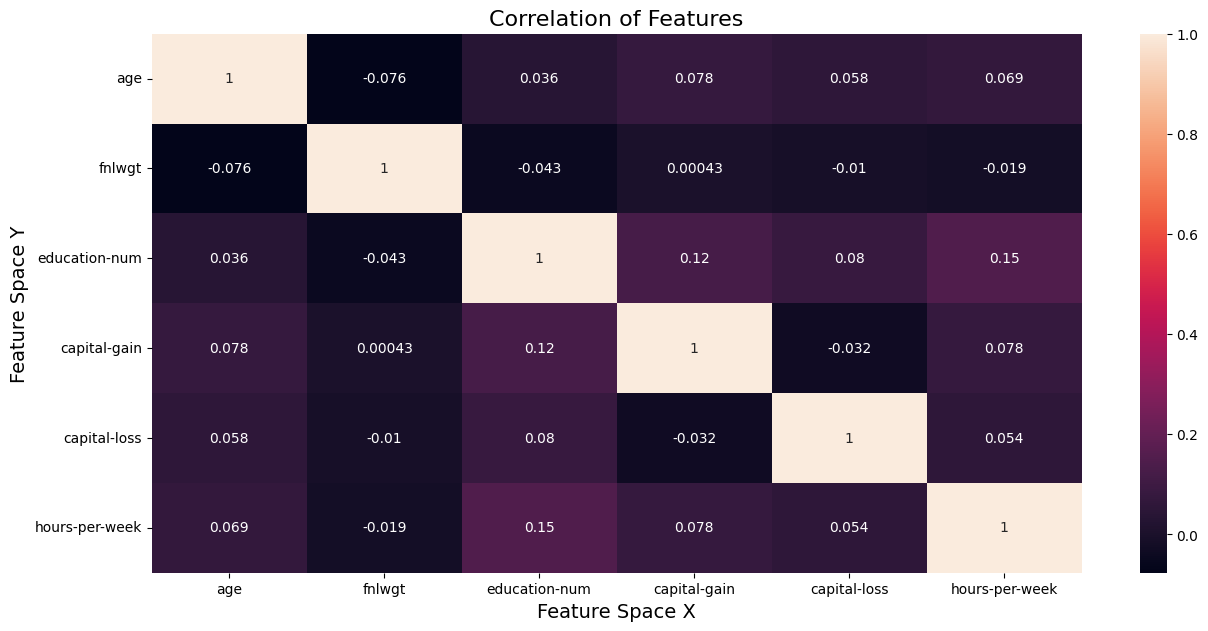

In [174]:
df1 = inc_df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]
corr_matrix = df1.corr()

plt.figure(figsize = (15,7))
corr_matrix = df1.corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

# X- Y Split

In [175]:
inc_df['tv']=inc_df.iloc[:,14]
inc_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K,tv
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,False,False
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,False,False
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,False,False
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,False,False
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,True,True
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,False,False
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,False,False
32560,52.0,Self-emp-inc,287927.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,True,True


In [176]:
inc_df.drop(inc_df.columns[14], axis=1, inplace=True)
inc_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,tv
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,False
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,False
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,False
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,False
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,False


In [177]:
x = inc_df.drop(columns = ['tv'])
y = inc_df['tv']

In [178]:
y.value_counts()

,count
tv,
False,24699
True,7839


# Train Test Split

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#cat-con split

In [180]:
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cont = x_train.select_dtypes(exclude=['object'])

In [181]:
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_cont = x_test.select_dtypes(exclude=['object'])

# Encoding

In [182]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False , drop = 'first',handle_unknown='ignore')
encoder.fit(x_train_cat)

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [183]:
x_train_cat_encoded = pd.DataFrame(data = encoder.transform(x_train_cat),
                                   index = x_train_cat.index,
                                   columns = encoder.get_feature_names_out(x_train_cat.columns))

x_test_cat_encoded = pd.DataFrame(data = encoder.transform(x_test_cat),
                                    index = x_test_cat.index,
                                    columns = encoder.get_feature_names_out(x_test_cat.columns))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Scaling

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(x_train_cont)

MinMaxScaler()

In [185]:
x_train_cont_scaled = pd.DataFrame(scaler.transform(x_train_cont),
            index = x_train_cont.index,
            columns = x_train_cont.columns )

x_test_cont_scaled = pd.DataFrame(scaler.transform(x_test_cont),
            index = x_test_cont.index,
            columns = x_test_cont.columns)

#concatination

In [186]:
x_train_comb = pd.concat([x_train_cat_encoded,x_train_cont_scaled], axis=1)
x_test_comb = pd.concat([x_test_cat_encoded,x_test_cont_scaled], axis=1)

In [187]:
x_train_comb.shape

(22776, 100)

#KNN imputer

In [188]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(x_train_comb)

KNNImputer(n_neighbors=3)

In [189]:
x_train_comb_imputed = pd.DataFrame(imputer.transform(x_train_comb),
            index = x_train_comb.index,
            columns = x_train_comb.columns )

x_test_comb_imputed = pd.DataFrame(imputer.transform(x_test_comb),
            index = x_test_comb.index,
            columns = x_test_comb.columns)

# Dimensionality Reduction

In [190]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(x_train_comb_imputed)

PCA()

In [191]:
(pd.Series(np.cumsum(pca.explained_variance_ratio_)) <= 0.90).sum()

29

In [192]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

,0
0,0.141871
1,0.221000
2,0.289382
3,0.351622
4,0.409669
...,...
95,0.999944
96,0.999989
97,1.000000
98,1.000000


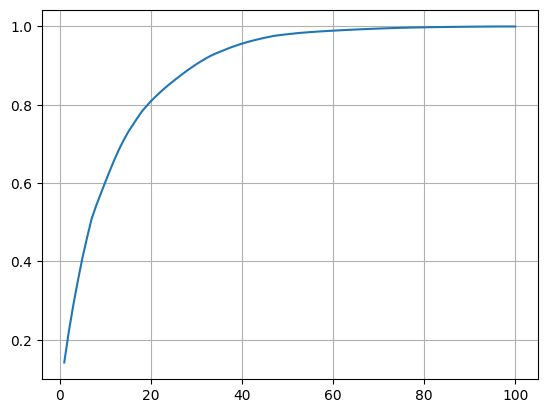

In [193]:
plt.plot(pd.Series(np.cumsum(pca.explained_variance_ratio_), index = range(1,101)))
plt.grid()

In [194]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 30)

# Fit PCA on the training data
pca1.fit(x_train_comb_imputed)

PCA(n_components=30)

In [195]:
cols = 'P' + pd.Series(range(1,31)).astype(str) # Change 21 to 31 to match the number of components in pca1
x_train_pca = pd.DataFrame(data = pca1.transform(x_train_comb_imputed),
            index = x_train_comb_imputed.index,
            columns = cols)

In [199]:
x_train_pca.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30
1216,0.841492,-0.471783,0.086301,-0.445097,-0.819479,0.435642,-0.869394,-0.064535,0.057604,-0.029710,...,-0.099515,-0.028429,0.154783,0.247546,-0.061359,0.058276,0.007889,0.006943,-0.021486,-0.142432
27959,0.199523,-0.275873,-0.017575,-1.141591,0.495235,0.640625,0.403751,0.031285,-0.773013,-0.439337,...,0.079047,-0.030902,0.026293,-0.020344,-0.179014,-0.129853,-0.159330,0.061537,-0.093610,-0.043916
23078,0.792480,-0.270824,0.186182,0.095236,0.391916,-0.249111,0.148604,-0.699618,-0.210864,-0.111246,...,0.051743,0.117286,-0.254159,0.077600,-0.018180,0.031389,0.126939,-0.072488,0.017637,-0.009073
19679,0.700744,0.785921,0.200653,0.089699,0.108216,0.014117,0.234730,0.233496,-0.454076,0.708221,...,0.047017,0.049018,-0.049187,-0.047920,-0.128785,0.086243,0.007065,0.001016,0.091249,0.043556
19181,-0.980904,0.486560,-0.380582,0.593481,0.334316,0.253116,0.220179,0.652438,0.144314,-0.289234,...,0.024883,0.053194,-0.170597,0.023822,-0.068785,0.095611,0.025740,-0.072807,0.050528,0.069248


In [198]:
x_test_pca = pd.DataFrame(data = pca1.transform(x_test_comb_imputed),
            index = x_test_comb_imputed.index,
            columns = cols)

# Model Building

#logistic regression

In [200]:
train_features = x_train_pca.columns

In [201]:
x_test_pca = x_test_pca[train_features]

In [202]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [203]:
y_pred = model.predict(x_test_pca)

## KNN Classifier

In [204]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_pca, y_train)

KNeighborsClassifier()

In [205]:
y_pred_KNN = knn_classifier.predict(x_test_pca)

## Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [207]:
y_pred_rf = rf_classifier.predict(x_test_pca)

# Model Evaluation

In [208]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Logistic Regression

In [209]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8263675476336816
              precision    recall  f1-score   support

       False       0.86      0.92      0.89      7417
        True       0.68      0.53      0.59      2345

    accuracy                           0.83      9762
   macro avg       0.77      0.73      0.74      9762
weighted avg       0.82      0.83      0.82      9762

[[6824  593]
 [1102 1243]]


## KNN

In [210]:
accuracy = accuracy_score(y_test, y_pred_KNN)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_KNN))
print(confusion_matrix(y_test, y_pred_KNN))

Accuracy: 0.8139725466093014
              precision    recall  f1-score   support

       False       0.87      0.89      0.88      7417
        True       0.62      0.57      0.60      2345

    accuracy                           0.81      9762
   macro avg       0.75      0.73      0.74      9762
weighted avg       0.81      0.81      0.81      9762

[[6603  814]
 [1002 1343]]


## Random Forest

In [211]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8135627945093219
              precision    recall  f1-score   support

       False       0.87      0.89      0.88      7417
        True       0.62      0.56      0.59      2345

    accuracy                           0.81      9762
   macro avg       0.75      0.73      0.74      9762
weighted avg       0.81      0.81      0.81      9762

[[6628  789]
 [1031 1314]]
